**Spam Email Classifier**

Task :
Build a classification model which will be able to distinguish between spam/not spam. You should
compare the performance of few classification algorithms by your choice and choose the best
performing one. You should perform k-fold cross-validation.

In [ ]:
#All the necessary imports used throughout the file.
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#Authentication required for Google colab files. Note that we are reading data files(datasets) from the drive and hence there is a GoogleDrive depencdency.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**DataSet Details:**
The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

In [ ]:
#Code to download the dataset and convert it into dataframe.
downloaded = drive.CreateFile({'id':"12IhRv4WkpMyCYicnsJVeKxuVk0co6E5s"})   # replace the id with id of file you want to access
downloaded.GetContentFile('spambase.data')

downloadedc = drive.CreateFile({'id':"1g-rZgD7Bg_Hzh3sMZaqLf1AQIcvhXhIp"})   # replace the id with id of file you want to access
downloadedc.GetContentFile('spambase.names')

f = open('spambase.names','r')
count = 0
columns = []
while(True):
  line = f.readline()
  if(line):
    count += 1
    if(count>=34):
      columns.append(line.split(":")[0]) 
  else:
    break
columns.append('spam')
#print(columns) 
data = pd.read_csv('spambase.data')
df = pd.DataFrame(data)
df.columns = columns
print(df)

      word_freq_make  word_freq_address  ...  capital_run_length_total  spam
0               0.21               0.28  ...                      1028     1
1               0.06               0.00  ...                      2259     1
2               0.00               0.00  ...                       191     1
3               0.00               0.00  ...                       191     1
4               0.00               0.00  ...                        54     1
...              ...                ...  ...                       ...   ...
4595            0.31               0.00  ...                        88     0
4596            0.00               0.00  ...                        14     0
4597            0.30               0.00  ...                       118     0
4598            0.96               0.00  ...                        78     0
4599            0.00               0.00  ...                        40     0

[4600 rows x 58 columns]


**Classifiers detail : ** Note: Few parameters have been fine tuned for better performance results.
1. LogisticRegression - We will use lbfgs solver with 2000 iterations
2. KNeighborsClassifier - we are using Euclidean metrics with 4 neighbours to classify the given predict data point.
3. SVC - we are using rbf kernal for this classification
4. MultinomialNB - alpha value has been fine tuned to 1 for getting better resutls and fit_prior is made true.
5. RandomForestClassifier - Using 50 estimators with maxdepth of decision trees set to 50
6. MLPClassifier - Neural Network approach for solving the problem. Fine tuned a parameters for better results.

[[0.9235710332832635, 0.9299154083326744, 0.9136538461538461, 0.9358006773101113, 0.9127120026092629, 0.9058788291917126, 0.9264267818744946, 0.9190291183552884, 0.9172356957852602, 0.93540991382718], [0.7974938730334414, 0.7683216064511028, 0.8115384615384615, 0.7746976294146105, 0.7632093933463796, 0.7682138356984983, 0.7717642185003255, 0.7825026811550212, 0.7867514323836432, 0.7820578701873665], [0.8662740137560282, 0.8118230690173137, 0.8428846153846155, 0.8604257377842284, 0.8217547292889759, 0.8294499184069736, 0.8230455110374623, 0.8215362512394018, 0.8410839023624519, 0.8411929796821883], [0.7704166337259862, 0.7952407304925291, 0.8063461538461538, 0.7403483309143687, 0.7706294846705806, 0.7951085497097767, 0.7686472943915094, 0.7888362775450738, 0.7728200298249744, 0.7736579966795795], [0.9571902917226658, 0.9397580836429756, 0.9615384615384616, 0.946589259796807, 0.9403946510110893, 0.9446716655305614, 0.951845495255568, 0.9457597280398228, 0.9521819323444, 0.949798403035813

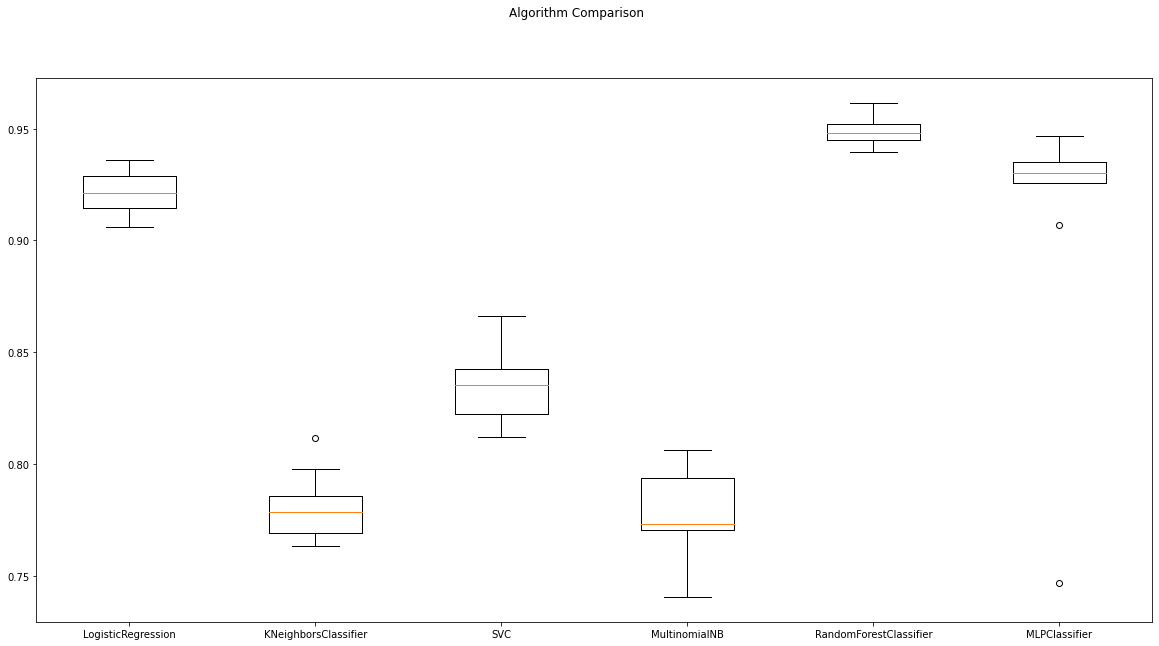

RandomForestClassifier 0.9489727971918163


In [ ]:
X = df.drop(['spam'],axis=1).values
y = df['spam'].values

classifiers = [
               LogisticRegression(solver = "lbfgs",max_iter = 2000),
               KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean', p = 2),
               SVC(kernel = 'rbf',gamma='auto'),
               MultinomialNB(alpha=1.0,fit_prior=True),
               RandomForestClassifier(n_estimators=50,max_depth=50),
               MLPClassifier(solver='adam',activation='relu', alpha=1e-8,hidden_layer_sizes=(12, 5, 5),learning_rate = 'constant', learning_rate_init=0.0001, max_iter=2000)
            ]
names = ["LogisticRegression","KNeighborsClassifier","SVC","MultinomialNB","RandomForestClassifier","MLPClassifier"]
results = []
kfold = 10
seed = 7
best_auc = -1
for i in range(0,len(classifiers)):
  classifier = classifiers[i]
  total_auc = 0
  kfold_result = []
  kf = model_selection.KFold(n_splits=kfold, shuffle= True,random_state=seed)
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    classifier.fit(X_train,y_train)
    predict_y = classifier.predict(X_test)
    auc = roc_auc_score(y_test,predict_y)
    kfold_result.append(auc)
    total_auc += auc
  mean_auc_kfolds = total_auc/kfold
  results.append(kfold_result)
  if best_auc<mean_auc_kfolds:
    best_auc = mean_auc_kfolds
    bestalgo = names[i]
    index = i
print(results)
print(names)
# boxplot algorithm comparison
fig = plt.figure(figsize=(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

print(bestalgo,best_auc)

**Inference from comparision** 
We could infere that RandomForestClassifier works the best for given set of inputs. But if we look closely, LogisticRegression, MLP and RandomForestClassifier all the 3 are performing pretty well.If we can more fine tune the paramters or increase the dataset size, we may end up getting more better results in any of the 3 algorithms. In MLP neural network based classifier we can see there are few outliers which can be retrained and we can get more better results. For KNN, SVC and multinomial, we can infere that this classifiers dont work well with contiguous data. The boxplot shows some skew in the distribution of data for this classifiers. Since RandomForestClassifier gave the best results, lets get confusion matrix and print the required table for the same.

**Confusion matrix and details with KFold cross validation for the best performing model**

KFold Cross Validation ensures that we wont overfit the model.

1.  False positive rate - Fraction of non-spam testing examples that are misclassified as spam
2.  False negative rate - Fraction of spam testing examples that are misclassified as non-spam
3.  Overall error rate - Fraction of overall examples that are misclassified.


In [ ]:
total_false_positive = 0
total_false_negative = 0
total_error = 0 
average_false_positive = 0
average_false_negative = 0 
avg_error = 0
fp = []
fn = []
overall_error_rate = []

classifier = classifiers[index]
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index] 
  y_train, y_test = y[train_index], y[test_index]

  classifier.fit(X_train,y_train)
  predict_y = classifier.predict(X_test)
  matrix = confusion_matrix(y_test,predict_y)
  false_positive_rate = matrix[0][1]/(matrix[0][1] + matrix[0][0])
  false_negative_rate = matrix[1][0]/(matrix[1][0] + matrix[1][1])
  fp.append(false_positive_rate)
  fn.append(false_negative_rate)
  overall_error_rate.append(1 - accuracy_score(y_test,predict_y))
  total_false_negative += false_negative_rate
  total_false_positive += false_positive_rate
  total_error += 1 - accuracy_score(y_test,predict_y)    

average_false_positive = total_false_positive/kfold
average_false_negative = total_false_negative/kfold
avg_error = total_error/kfold


Table = pd.DataFrame(list(zip(fp,fn,overall_error_rate)),columns = ['False Positive Rate','False Negative Rate','Overall Error Rate'])
Table.loc[kfold] = [average_false_positive,average_false_negative,avg_error]
display(Table)

,False Positive Rate,False Negative Rate,Overall Error Rate
0,0.017986,0.071429,0.039130
1,0.028777,0.087912,0.052174
2,0.026923,0.055000,0.039130
3,0.052830,0.046154,0.050000
4,0.013699,0.119048,0.052174
5,0.040404,0.067485,0.050000
6,0.018051,0.060109,0.034783
7,0.027682,0.081871,0.047826
8,0.032847,0.059140,0.043478
9,0.017986,0.082418,0.043478
